In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('healthcare_noshows.csv')

In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


In [6]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41
106986,3.775115e+14,5629448,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,False,False,False,False,False,True,True,41


In [7]:
df.describe()

,PatientId,AppointmentID,Age,Date.diff
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,10.166721
std,2.558267e+14,7.133274e+04,22.466214,15.263508
min,3.921784e+04,5.030230e+06,1.000000,-6.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,4.000000
75%,9.433600e+13,5.725634e+06,56.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,179.000000


In [8]:
from pyspark.sql import SparkSession

In [9]:
gender_count=df['Gender'].value_counts()

In [10]:
print(gender_count)

Gender
F    70118
M    36869
Name: count, dtype: int64


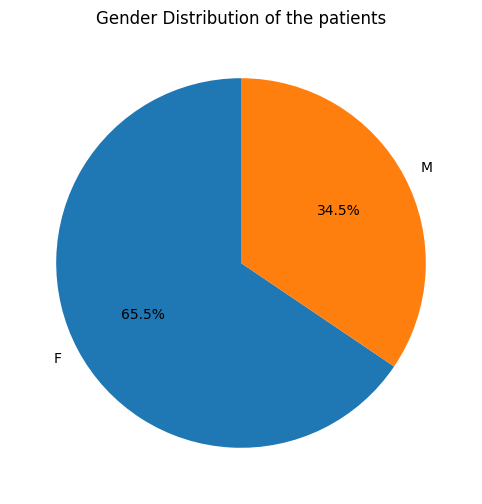

In [11]:
gender_count_pd=gender_count.to_frame()
plt.figure(figsize=(8,6))
plt.pie(gender_count_pd[gender_count_pd.columns[0]],labels=gender_count_pd.index,autopct='%1.1f%%',startangle=90)
plt.title('Gender Distribution of the patients')
plt.show()

In [12]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [13]:
import seaborn as sns

In [14]:
max_date_difference=max(df['Date.diff'])
print(max_date_difference)

179


In [15]:
negative_count=(df['Date.diff']<0).sum()
print(negative_count)

5


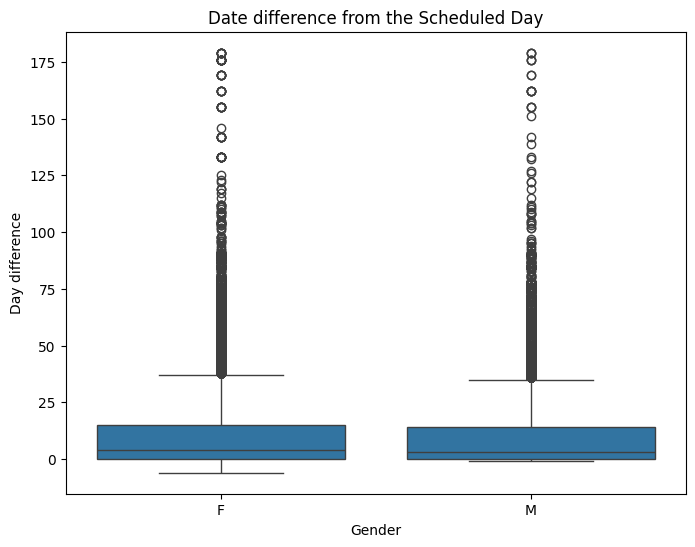

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='Gender',y='Date.diff')
plt.title("Date difference from the Scheduled Day")
plt.xlabel('Gender')
plt.ylabel('Day difference')
plt.show()

Hipertension
False    85186
True     21801
Name: count, dtype: int64


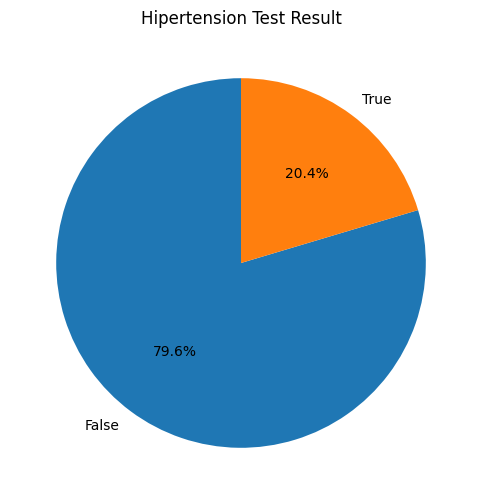

In [17]:
hp=df['Hipertension'].value_counts()
print(hp)
hppd=hp.to_frame()
plt.figure(figsize=(8,6))
plt.pie(hppd[hppd.columns[0]],labels=hppd.index,autopct='%1.1f%%',startangle=90)
plt.title('Hipertension Test Result')
plt.show()

Diabetes
False    99044
True      7943
Name: count, dtype: int64


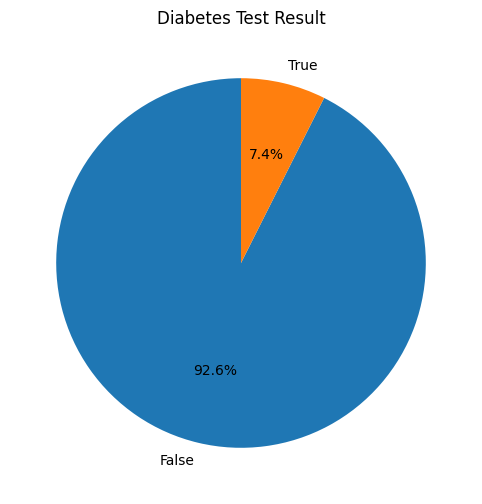

In [18]:
Db=df['Diabetes'].value_counts() 
print(Db)
Dbpd=Db.to_frame()
plt.figure(figsize=(8,6))
plt.pie(Dbpd[Dbpd.columns[0]],labels=Dbpd.index,autopct='%1.1f%%',startangle=90)
plt.title('Diabetes Test Result')
plt.show()

Handcap
False    104747
True       2240
Name: count, dtype: int64


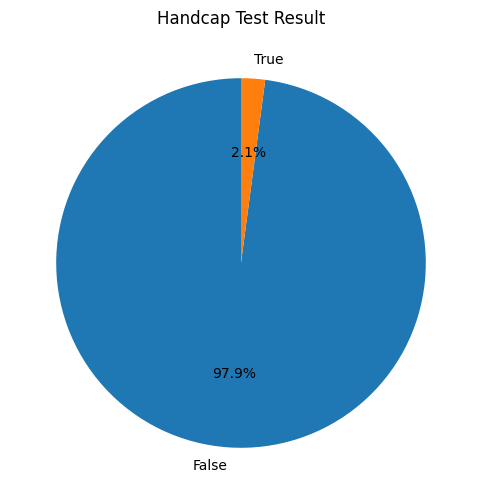

In [19]:
Hb=df['Handcap'].value_counts() 
print(Hb)
Hbpd=Hb.to_frame()
plt.figure(figsize=(8,6))
plt.pie(Hbpd[Hbpd.columns[0]],labels=Hbpd.index,autopct='%1.1f%%',startangle=90)
plt.title('Handcap Test Result')
plt.show()

Alcoholism
False    103627
True       3360
Name: count, dtype: int64


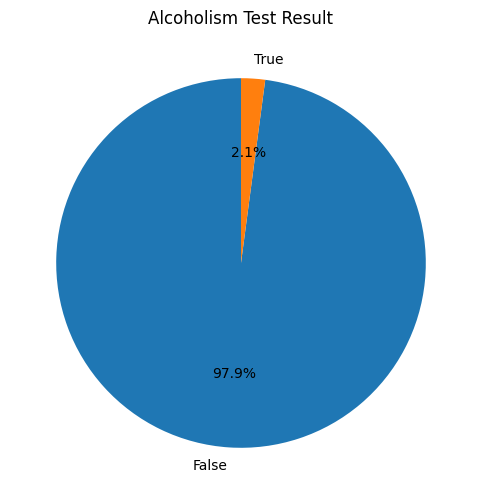

In [20]:
Ac=df['Alcoholism'].value_counts() 
print(Ac)
Acpd=Hb.to_frame()
plt.figure(figsize=(8,6))
plt.pie(Acpd[Acpd.columns[0]],labels=Acpd.index,autopct='%1.1f%%',startangle=90)
plt.title('Alcoholism Test Result')
plt.show()

Age
1      2273
52     1746
49     1652
53     1651
56     1635
       ... 
98        6
115       5
100       4
102       2
99        1
Name: count, Length: 102, dtype: int64


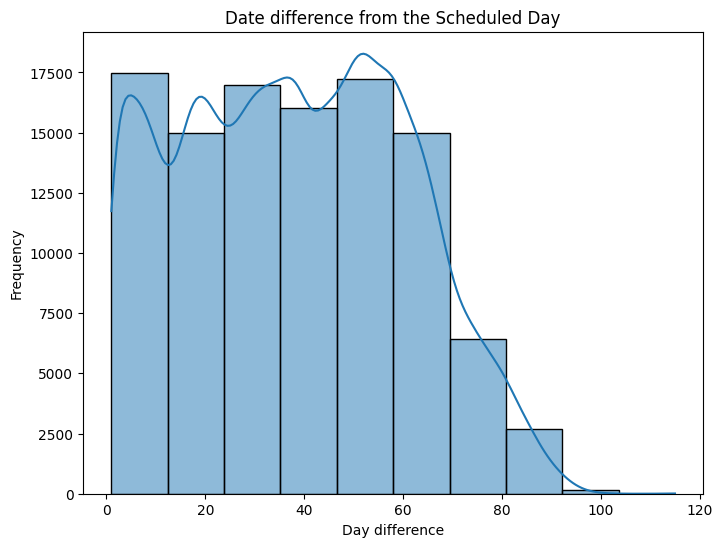

In [20]:
Age_count=df['Age'].value_counts()
print(Age_count)
plt.figure(figsize=(8,6))
sns.histplot(df['Age'],bins=10,edgecolor="black",kde=True)
plt.title("Date difference from the Scheduled Day")
plt.xlabel('Day difference')
plt.ylabel('Frequency')
plt.show()

In [21]:
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: -36.5, Upper Bound: 111.5


In [22]:
data=pd.DataFrame({'age':df['Age']})
outliers_iqr=data[(data['age']<lower_bound)|(data['age']>upper_bound)]

In [23]:
print(outliers_iqr)

       age
61803  115
61806  115
65876  115
73825  115
94560  115


In [24]:
null_count=df['Date.diff'].isnull().sum()
print(null_count)
null_count1=df['Age'].isnull().sum()
print(null_count1)

0
0


In [25]:
mean_age=data['age'].mean()
std_age=data['age'].std()
data['z_score']=(data['age']-mean_age)/std_age
outliers_z=data[(data['z_score']>3)|(data['z_score']<-3)]
print(outliers_z)

       age   z_score
61803  115  3.413299
61806  115  3.413299
65876  115  3.413299
73825  115  3.413299
94560  115  3.413299


In [26]:
data1=pd.DataFrame({'Datediff':df['Date.diff']})
Datediff=data1.sort_values(by='Datediff')
print(Datediff)

       Datediff
69225        -6
53324        -1
26222        -1
70039        -1
62055        -1
...         ...
99453       179
99452       179
99451       179
99460       179
99459       179

[106987 rows x 1 columns]


In [27]:
Datediff_iqr=14
lower_bound1 = 0 - 1.5 *Datediff_iqr
upper_bound1 = 14 + 1.5 * Datediff_iqr
outliers_iqrdatediff=Datediff[(Datediff['Datediff']<lower_bound1)|(Datediff['Datediff']>upper_bound1)]
print(outliers_iqrdatediff)

        Datediff
106684        36
91100         36
65911         36
65932         36
104329        36
...          ...
99453        179
99452        179
99451        179
99460        179
99459        179

[6489 rows x 1 columns]


In [28]:
outliers_iqrdatediff.tail()

,Datediff
99453,179
99452,179
99451,179
99460,179
99459,179


In [29]:
mean_datediff=Datediff['Datediff'].mean()
std_datediff=Datediff['Datediff'].std()
Datediff['z_score']=(Datediff['Datediff']-mean_datediff)/std_datediff
outliers_zs=Datediff[(Datediff['z_score']>3)|(Datediff['z_score']<-3)]
print(outliers_zs)

        Datediff    z_score
63326         56   3.002801
103689        56   3.002801
103727        56   3.002801
1075          56   3.002801
103726        56   3.002801
...          ...        ...
99453        179  11.061237
99452        179  11.061237
99451        179  11.061237
99460        179  11.061237
99459        179  11.061237

[2588 rows x 2 columns]


In [31]:
from scipy import stats

z_scores = stats.zscore(Datediff['Datediff'])
abs_z_scores = abs(z_scores)
outliers = Datediff[abs_z_scores > 3]

In [32]:
print(outliers)

        Datediff    z_score
63326         56   3.002801
103689        56   3.002801
103727        56   3.002801
1075          56   3.002801
103726        56   3.002801
...          ...        ...
99453        179  11.061237
99452        179  11.061237
99451        179  11.061237
99460        179  11.061237
99459        179  11.061237

[2588 rows x 2 columns]


In [33]:
Datediff['Datediff']=Datediff['Datediff'].apply(lambda x:38 if(x<lower_bound1 or x>upper_bound1) else x)

In [34]:
print(Datediff)

       Datediff    z_score
69225        -6  -1.059175
53324        -1  -0.731596
26222        -1  -0.731596
70039        -1  -0.731596
62055        -1  -0.731596
...         ...        ...
99453        38  11.061237
99452        38  11.061237
99451        38  11.061237
99460        38  11.061237
99459        38  11.061237

[106987 rows x 2 columns]


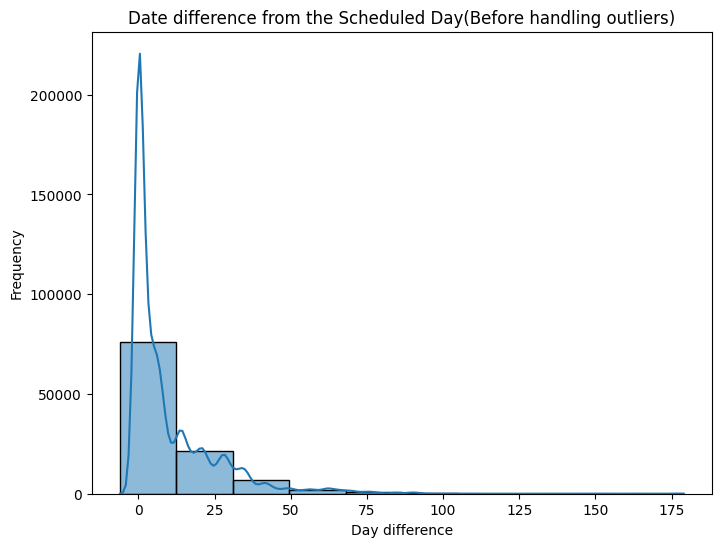

In [35]:
plt.figure(figsize=(8,6))
sns.histplot(df['Date.diff'],bins=10,edgecolor="black",kde=True)
plt.title("Date difference from the Scheduled Day(Before handling outliers)")
plt.xlabel('Day difference')
plt.ylabel('Frequency')
plt.show()

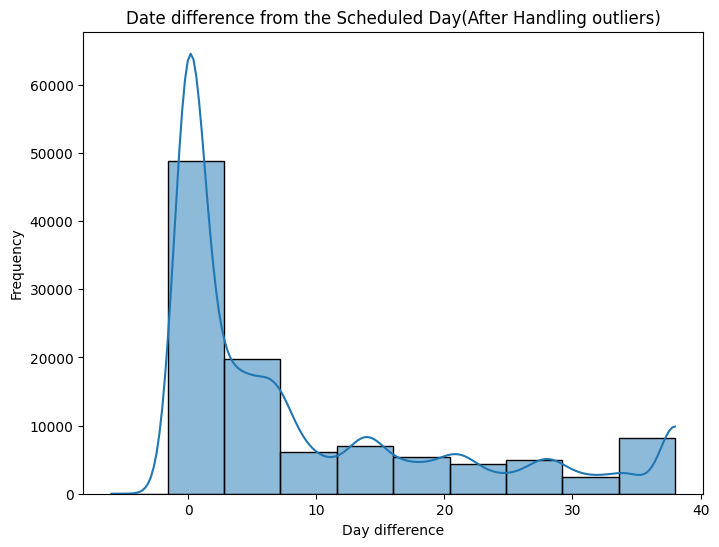

In [35]:
plt.figure(figsize=(8,6))
sns.histplot(Datediff['Datediff'],bins=10,edgecolor="black",kde=True)
plt.title("Date difference from the Scheduled Day(After Handling outliers)")
plt.xlabel('Day difference')
plt.ylabel('Frequency')
plt.show()

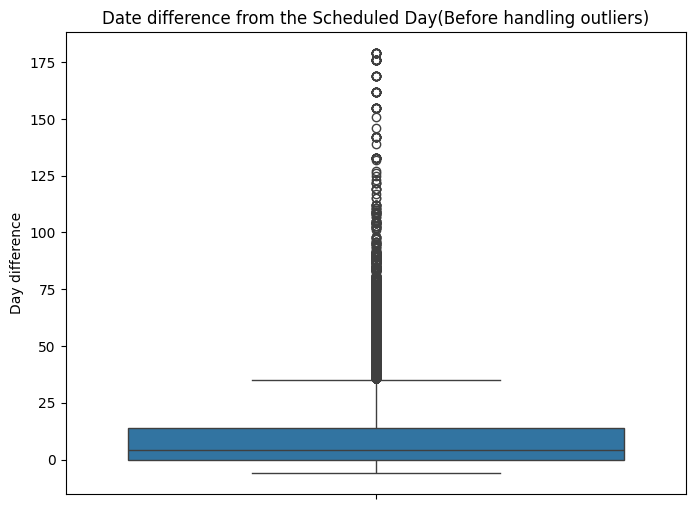

In [34]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Date.diff'])
plt.title("Date difference from the Scheduled Day(Before handling outliers)")
plt.xlabel('')
plt.ylabel('Day difference')
plt.show()

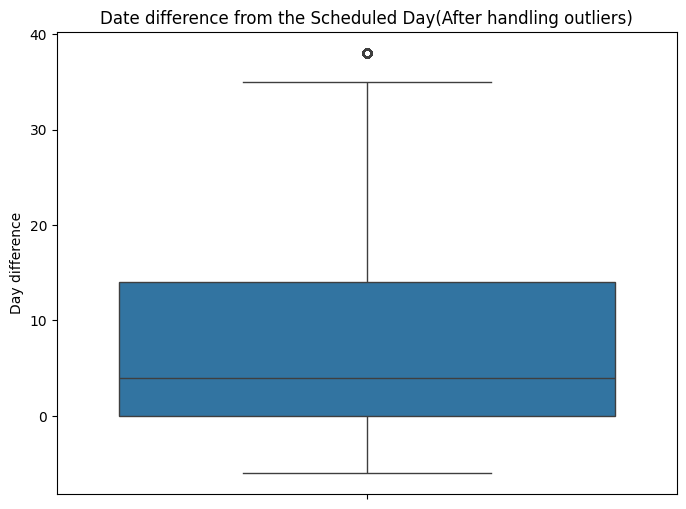

In [36]:
plt.figure(figsize=(8,6))
sns.boxplot(Datediff['Datediff'])
plt.title("Date difference from the Scheduled Day(After handling outliers)")
plt.xlabel('')
plt.ylabel('Day difference')
plt.show()

In [37]:
(6489/106986)*100

6.06527956928944

In [ ]:
#Bivariate Analysis

In [ ]:
#Numerical&Numerical(Scatter plot)

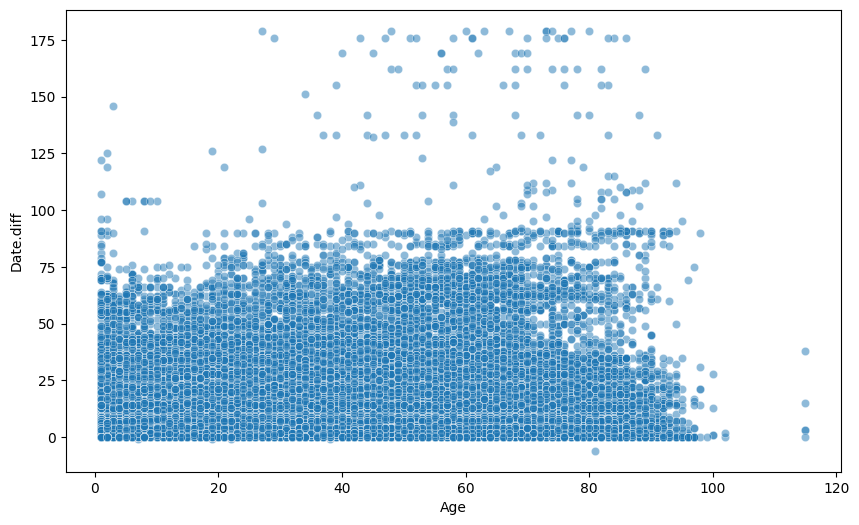

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Age',y='Date.diff',alpha=0.5)
plt.show()

In [38]:
df_selected =df[['Age','Date.diff']]

In [39]:
correlation_matrix=df_selected.corr()
print(correlation_matrix)

               Age  Date.diff
Age        1.00000    0.03888
Date.diff  0.03888    1.00000


In [40]:

mean_age=df['Age'].mean()
mean_datediff=df['Date.diff'].mean()
result=(df['Age']*df['Date.diff']).mean()
covxy=result-mean_age*mean_datediff
sxsy=df['Age'].std()*df['Date.diff'].std()
r=covxy/sxsy

In [41]:
print("corelation coefficient:",r)

corelation coefficient: 0.03887976563086892


In [ ]:
#from the  above value, we can interprate that there is no correlation between Age and the Date.diff

<BarContainer object of 106987 artists>

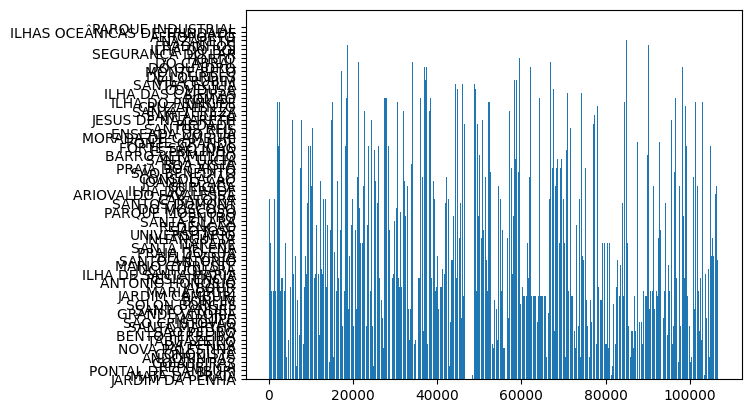

In [43]:
fig, ax = plt.subplots()
ax.bar(df.index,df['Neighbourhood'])

In [44]:
valuecountofneighbour=df['Neighbourhood'].value_counts()
print(valuecountofneighbour)

Neighbourhood
JARDIM CAMBURI                 7586
MARIA ORTIZ                    5563
RESISTÊNCIA                    4235
JARDIM DA PENHA                3851
ITARARÉ                        3412
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64


In [45]:
from scipy.stats import chi2_contingency

In [47]:
requ=df[['Neighbourhood','Diabetes']]

In [48]:
contingency_table=pd.crosstab(df['Neighbourhood'],df['Diabetes'])
print(contingency_table)

Diabetes             False  True 
Neighbourhood                    
AEROPORTO                8      0
ANDORINHAS            1896    299
ANTÔNIO HONÓRIO        254      3
ARIOVALDO FAVALESSA    249     19
BARRO VERMELHO         395     23
...                    ...    ...
SÃO JOSÉ              1630    238
SÃO PEDRO             2097    249
TABUAZEIRO            2779    240
UNIVERSITÁRIO          134     17
VILA RUBIM             739     90

[81 rows x 2 columns]


In [49]:
from scipy.stats import chi2_contingency

In [ ]:
#Ho:the taken categories are completely independent
#H1:against the null hypo, they are dependent 

In [52]:
chi2,p,dof,expected=chi2_contingency(contingency_table)
print(f"Chi-square statistics:{chi2}")
print(f"p-value:{p}")
print(f"Degrees of Freedom:{dof}")
print("Expected Frequecies:")
print(expected)

Chi-square statistics:1635.4170264606178
p-value:1.501958086428688e-288
Degrees of Freedom:80
Expected Frequecies:
[[7.40605868e+00 5.93941320e-01]
 [2.03203735e+03 1.62962650e+02]
 [2.37919635e+02 1.90803649e+01]
 [2.48102966e+02 1.98970342e+01]
 [3.86966566e+02 3.10334340e+01]
 [1.69783895e+03 1.36161048e+02]
 [7.85967977e+02 6.30320226e+01]
 [2.82355987e+02 2.26440128e+01]
 [2.49954480e+03 2.00455195e+02]
 [2.30421001e+03 1.84789993e+02]
 [3.03833557e+03 2.43664427e+02]
 [2.85133259e+02 2.28667408e+01]
 [7.49863441e+02 6.01365586e+01]
 [1.22847998e+03 9.85200165e+01]
 [1.25625270e+03 1.00747296e+02]
 [1.99500706e+03 1.59992943e+02]
 [2.77727201e+02 2.22727995e+01]
 [4.96205932e+02 3.97940684e+01]
 [3.65674147e+02 2.93258527e+01]
 [7.61898287e+02 6.11017133e+01]
 [2.11998430e+02 1.70015703e+01]
 [4.94354417e+02 3.96455831e+01]
 [6.17480142e+02 4.95198576e+01]
 [1.67469502e+03 1.34304981e+02]
 [2.35142363e+02 1.88576369e+01]
 [6.35069532e+02 5.09304682e+01]
 [9.82228532e+02 7.87714676

In [ ]:
#p value here is 10^-288 which is almost zero.so, there is a complete dependancy between the two variables.
#(if we examine with the significant level of 5%,we can reject the null hypo)
#similar to that, we can compare the other categorical variables such as neighbourhood and alcoholism or handcap or Date.diff columns of the frame
#the diabetes results are dependent on the neighbourhood
#the reason is because for some neighbour the population age is over 60 . let's look into that

In [55]:
dfcn=df[['Neighbourhood','Age']]

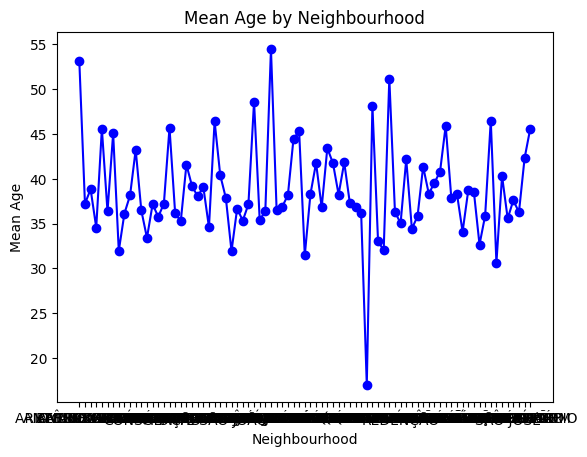

In [57]:
grouped_data=dfcn.groupby('Neighbourhood')['Age'].mean().reset_index()
plt.plot(grouped_data['Neighbourhood'],grouped_data['Age'],marker='o',linestyle='-',color='b')
plt.title('Mean Age by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Age')
plt.show()

In [58]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.8 MB 8.5 MB/s eta 0:00:02
   ------------ --------------------------- 3.1/9.8 MB 8.8 MB/s eta 0:00:01
   ------------------------ --------------- 6.0/9.8 MB 10.6 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.8 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 11.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [59]:
from statsmodels.stats.weightstats import ztest

In [74]:
import numpy as np

In [79]:
valuecounts=df['Neighbourhood'].value_counts()

In [80]:
print(valuecounts)

Neighbourhood
JARDIM CAMBURI                 7586
MARIA ORTIZ                    5563
RESISTÊNCIA                    4235
JARDIM DA PENHA                3851
ITARARÉ                        3412
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64


In [ ]:
#here are 81 types of different categories. so, we will perform ANOVA

In [84]:
from scipy import stats

In [ ]:
#Ho:there is no significant difference between mean ages of the groups
#H1:Atleast one neibour has a mean age that is significantly different from the others

In [85]:
anova_result=stats.f_oneway(*[df[df['Neighbourhood']==neighbour]['Age'] for neighbour in df['Neighbourhood'].unique()])
print(f"F-statistics:{anova_result.statistic}")
print(f"P-value:{anova_result.pvalue}")
alpha =0.05
if anova_result.pvalue<alpha:
    print("Reject the null hypothesis :There is a significant difference in the the mean age between neighbours.")
else :
    print("Fail to reject the null hypothesis : No significant difference in the mean age between neighbours.")

F-statistics:44.90069159583622
P-value:0.0
Reject the null hypothesis :There is a significant difference in the the mean age between neighbours.


In [86]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [87]:
tukey_result=pairwise_tukeyhsd(endog=df['Age'],groups=df['Neighbourhood'],alpha=0.05)
print(tukey_result)

                       Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
           group1                      group2           meandiff p-adj    lower    upper   reject
-------------------------------------------------------------------------------------------------
                  AEROPORTO                  ANDORINHAS -15.9168    1.0  -48.8845  17.0509  False
                  AEROPORTO             ANTÔNIO HONÓRIO -14.2729    1.0  -47.6889  19.1432  False
                  AEROPORTO         ARIOVALDO FAVALESSA -18.5616  0.999  -51.9569  14.8337  False
                  AEROPORTO              BARRO VERMELHO  -7.5461    1.0  -40.7672  25.6751  False
                  AEROPORTO                  BELA VISTA  -16.764 0.9999  -49.7435  16.2154  False
                  AEROPORTO              BENTO FERREIRA   -8.039    1.0  -41.1015  25.0234  False
                  AEROPORTO                   BOA VISTA -21.1643 0.9758  -54.5009  12.1722  False
                  AE

In [88]:
population_mean = 60
def z_test_neighborhood(df, population_mean):
    results = []
    neighborhoods = df['Neighbourhood'].unique()
     for neighborhood in neighborhoods:
        sample_data = df[df['Neighbourhood'] == neighborhood]['Age']
        z_stat, p_value = ztest(sample_data, value=population_mean)
        results.append({
            'Neighbourhood': neighborhood,
            'Z-statistic': z_stat,
            'P-value': p_value,
            'Mean Age': np.mean(sample_data),
            'Sample Size': len(sample_data)
        })
    return pd.DataFrame(results)
z_test_results = z_test_neighborhood(df, population_mean)
print(z_test_results)
alpha = 0.05
z_test_results['Significant'] = z_test_results['P-value'] < alpha
print(z_test_results[['Neighbourhood', 'Z-statistic', 'P-value', 'Significant']])

                  Neighbourhood  Z-statistic        P-value   Mean Age  \
0               JARDIM DA PENHA   -41.209884   0.000000e+00  45.290314   
1                 MATA DA PRAIA   -22.753148  1.335646e-114  41.744548   
2             PONTAL DE CAMBURI   -11.591705   4.540021e-31  32.028986   
3                     REPÚBLICA   -21.783240  3.345591e-105  42.180368   
4                    GOIABEIRAS   -20.466632   4.271393e-93  40.411079   
..                          ...          ...            ...        ...   
76                    FRADINHOS   -10.545524   5.327491e-26  46.421260   
77                     NAZARETH   -12.416968   2.114224e-35  36.833333   
78                    AEROPORTO    -1.778429   7.533350e-02  53.125000   
79  ILHAS OCEÂNICAS DE TRINDADE    -1.571429   1.160831e-01  54.500000   
80            PARQUE INDUSTRIAL          NaN            NaN  17.000000   

    Sample Size  
0          3851  
1           642  
2            69  
3           815  
4           686  
.. 

C:\Users\chand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\weightstats.py:1559: RuntimeWarning: invalid value encountered in scalar divide
  var = x1_var / (nobs1 - ddof)


In [ ]:
#False significant means either there is no difference between the population's mean and 60 or can not find ,due to NaN